In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import layers
from sklearn import preprocessing
from sklearn import model_selection
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/datasets/cleaned_soccer_data_120K.csv")
df_test = df.query('fifa==16').reset_index(drop=True)

In [4]:
df = df[df.player_positions.str.len() <= 3]
df.player_positions.unique()

array(['CF', 'ST', 'GK', 'LM', 'CB', 'LW', 'CM', 'CDM', 'RW', 'RB', 'RM',
       'CAM', 'LB', 'RWB', 'LWB'], dtype=object)

In [5]:
df

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,...,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,...,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF,ATK,15
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,1981-10-03,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,...,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST,ATK,15
4,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,...,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK,GK,15
7,7826,R. van Persie,Robin van Persie,1983-08-06,187,71,88,88,3,4,74.0,90.0,82.0,83.0,33.0,68.0,81,91,73,85,92,84,86,81,75,87,73,74,80,88,59,90,59,72,72,86,55,34,90,82,...,7,8,1,0,0,0,1,0,1,0,85,85,85,84,86,86,86,84,85,85,85,82,76,76,76,82,60,63,63,63,60,54,48,48,48,54,0,ST,ATK,15
9,156616,F. Ribéry,Franck Bilal Ribéry,1983-04-07,170,72,88,88,4,5,89.0,78.0,85.0,92.0,29.0,62.0,83,79,41,89,81,92,84,81,74,91,91,87,92,89,92,76,51,72,62,73,52,36,83,88,...,7,10,0,1,1,0,0,0,0,1,79,79,79,87,82,82,82,87,87,87,87,86,77,77,77,86,63,63,63,63,63,53,44,44,44,53,0,LM,MID,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,256679,K. Angulo,Kevin Angulo,1996-04-13,176,73,47,52,2,2,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,...,6,6,0,1,0,0,1,0,0,1,44,44,44,47,45,45,45,47,47,47,47,48,47,47,47,48,47,47,47,47,47,47,46,46,46,47,0,CM,MID,21
121405,257710,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,177,70,47,52,2,2,58.0,23.0,26.0,27.0,50.0,48.0,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,...,14,6,0,1,0,1,0,0,1,0,32,32,32,30,30,30,30,30,29,29,29,31,32,32,32,31,42,41,41,41,42,45,47,47,47,45,0,CB,DEF,21
121406,250989,Wang Zhenghao,王政豪,2000-06-28,185,74,47,51,2,2,51.0,25.0,29.0,36.0,45.0,55.0,20,20,46,40,22,35,20,25,25,30,54,49,40,45,57,35,69,58,55,22,46,45,25,25,...,15,13,0,1,0,1,0,0,0,1,34,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44,0,CB,DEF,21
121407,257697,Chen Zitong,Zitong Chen,1997-02-20,186,80,47,51,2,2,61.0,35.0,48.0,48.0,44.0,58.0,38,32,45,56,32,45,35,35,54,48,62,60,59,51,53,45,56,48,63,33,56,40,31,45,...,5,13,0,1,0,1,0,0,1,0,44,44,44,46,45,45,45,46,47,47,47,47,47,47,47,47,47,49,49,49,47,47,49,49,49,47,0,CM,MID,21


In [6]:
# drop useless columns and save them in a separate dataframe to be merged later

nominal_cols = ['sofifa_id','short_name','long_name','dob','fifa', 'player_positions_general']
df_nominal = df[nominal_cols]
df.drop(columns=nominal_cols,inplace=True)
df.head()

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions
0,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,25.0,21,6,11,15,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF
3,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,25.0,41,13,15,10,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST
4,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,25.0,25,87,85,92,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK
7,187,71,88,88,3,4,74.0,90.0,82.0,83.0,33.0,68.0,81,91,73,85,92,84,86,81,75,87,73,74,80,88,59,90,59,72,72,86,55,34,90,82,86,23.0,32,9,10,5,7,8,1,0,0,0,1,0,1,0,85,85,85,84,86,86,86,84,85,85,85,82,76,76,76,82,60,63,63,63,60,54,48,48,48,54,0,ST
9,170,72,88,88,4,5,89.0,78.0,85.0,92.0,29.0,62.0,83,79,41,89,81,92,84,81,74,91,91,87,92,89,92,76,51,72,62,73,52,36,83,88,80,25.0,25,15,6,9,7,10,0,1,1,0,0,0,0,1,79,79,79,87,82,82,82,87,87,87,87,86,77,77,77,86,63,63,63,63,63,53,44,44,44,53,0,LM


In [7]:
df_position = df['player_positions'].str.get_dummies(sep=',')
df_position.head()


,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
df.drop(columns=['player_positions'],inplace=True)

In [9]:
# check if all data is numerical

print(df.dtypes.values)

[dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('float64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('in

In [10]:
target_cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
              'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
              #"gk"
              ]

In [11]:
# normalize data using MinMaxScaler

scaler = preprocessing.MinMaxScaler()

df_preprocessed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_preprocessed

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.283019,0.295082,1.000000,1.000000,0.50,0.75,0.968750,0.978022,0.945055,1.000000,0.296703,0.692308,0.897727,0.989247,0.736264,0.931818,0.911111,0.989474,0.977011,0.966667,0.806818,1.000000,0.988372,0.929412,0.976471,0.986486,0.977011,0.829787,0.722892,0.779070,0.558140,0.965909,0.489362,0.211111,0.978261,0.955056,0.780220,0.265957,0.206522,0.055556,0.109890,0.148936,0.144444,0.075269,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,0.978261,0.978261,0.978261,1.000000,1.000000,1.000000,1.000000,1.000000,0.908046,0.908046,0.908046,1.000000,0.720930,0.720930,0.720930,0.720930,0.720930,0.635294,0.505618,0.505618,0.505618,0.635294,0.0
1,0.773585,0.754098,0.943396,0.903846,0.75,0.75,0.791667,1.000000,0.890110,0.895833,0.373626,0.945055,0.806818,0.956989,0.791209,0.875000,0.988889,0.905263,0.873563,0.855556,0.806818,0.934066,0.732558,0.776471,0.882353,0.864865,0.356322,0.968085,0.710843,0.790698,0.941860,0.965909,0.872340,0.188889,0.913043,0.876404,0.945055,0.265957,0.423913,0.133333,0.153846,0.095745,0.088889,0.118280,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.977528,0.977528,0.977528,0.913043,0.934783,0.934783,0.934783,0.913043,0.934783,0.934783,0.934783,0.922222,0.873563,0.873563,0.873563,0.922222,0.709302,0.755814,0.755814,0.755814,0.709302,0.658824,0.617978,0.617978,0.617978,0.658824,0.0
2,0.735849,0.704918,0.943396,0.903846,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227273,0.247312,0.230769,0.397727,0.244444,0.242105,0.241379,0.244444,0.409091,0.285714,0.546512,0.588235,0.376471,0.918919,0.287356,0.425532,0.783133,0.395349,0.825581,0.250000,0.287234,0.300000,0.250000,0.168539,0.351648,0.265957,0.250000,0.955556,0.923077,0.968085,0.988889,0.913978,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.622642,0.360656,0.905660,0.865385,0.50,0.75,0.770833,0.989011,0.901099,0.864583,0.362637,0.747253,0.863636,0.956989,0.758242,0.886364,0.988889,0.863158,0.942529,0.866667,0.795455,0.901099,0.720930,0.741176,0.811765,0.905405,0.563218,0.936170,0.554217,0.720930,0.697674,0.943182,0.563830,0.344444,0.956522,0.865169,0.890110,0.244681,0.326087,0.088889,0.098901,0.042553,0.066667,0.075269,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.955056,0.955056,0.955056,0.913043,0.934783,0.934783,0.934783,0.913043,0.923913,0.923913,0.923913,0.911111,0.873563,0.873563,0.873563,0.911111,0.697674,0.732558,0.732558,0.732558,0.697674,0.635294,0.539326,0.539326,0.539326,0.635294,0.0
4,0.301887,0.377049,0.905660,0.865385,0.75,1.00,0.927083,0.857143,0.934066,0.958333,0.318681,0.681319,0.886364,0.827957,0.406593,0.931818,0.866667,0.947368,0.919540,0.866667,0.784091,0.945055,0.930233,0.894118,0.952941,0.918919,0.942529,0.787234,0.457831,0.720930,0.581395,0.795455,0.531915,0.366667,0.880435,0.932584,0.824176,0.265957,0.250000,0.155556,0.054945,0.085106,0.066667,0.096774,0.0

In [12]:
nominal_cols.append('player_positions')
df_nominal_test = df_test[nominal_cols]
df_test.drop(columns=nominal_cols,inplace=True)
df_preprocessed_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)


In [13]:
df_preprocessed_test

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.301887,0.377049,1.018868,1.000000,0.75,0.75,0.958333,0.967033,0.945055,0.989583,0.263736,0.681319,0.852273,0.978495,0.736264,0.920455,0.911111,0.989474,0.977011,0.966667,0.840909,1.000000,0.976744,0.929412,0.952941,0.959459,0.977011,0.829787,0.662651,0.767442,0.546512,0.965909,0.489362,0.211111,0.956522,0.955056,0.758242,0.138298,0.228261,0.055556,0.109890,0.148936,0.144444,0.075269,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.977528,0.977528,0.977528,0.989130,0.989130,0.989130,0.989130,0.989130,0.989130,0.989130,0.989130,1.000000,0.942529,0.942529,0.942529,1.000000,0.720930,0.662791,0.662791,0.662791,0.720930,0.670588,0.494382,0.494382,0.494382,0.670588,0.0
1,0.584906,0.508197,1.000000,0.961538,0.75,1.00,0.958333,1.021978,0.879121,0.947917,0.362637,0.857143,0.875000,1.000000,0.901099,0.840909,0.933333,0.957895,0.965517,0.822222,0.761364,0.945055,0.930233,0.964706,0.929412,0.959459,0.597701,0.978723,0.975904,0.895349,0.779070,1.022727,0.638298,0.288889,0.989130,0.853933,0.879121,0.234043,0.315217,0.066667,0.109890,0.148936,0.144444,0.107527,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.022472,1.022472,1.022472,0.978261,0.989130,0.989130,0.989130,0.978261,0.956522,0.956522,0.956522,0.977778,0.919540,0.919540,0.919540,0.977778,0.744186,0.697674,0.697674,0.697674,0.744186,0.705882,0.584270,0.584270,0.584270,0.705882,0.0
2,0.490566,0.508197,0.943396,0.903846,0.25,0.75,0.958333,0.945055,0.901099,0.958333,0.351648,0.703297,0.852273,0.892473,0.516484,0.886364,0.922222,0.957895,0.942529,0.888889,0.784091,0.934066,0.941860,0.952941,0.941176,0.945946,0.931034,0.893617,0.578313,0.767442,0.616279,0.988636,0.478723,0.400000,0.945652,0.887640,0.824176,0.308511,0.260870,0.100000,0.076923,0.106383,0.044444,0.150538,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.943820,0.943820,0.943820,0.967391,0.956522,0.956522,0.956522,0.967391,0.956522,0.956522,0.956522,0.966667,0.919540,0.919540,0.919540,0.966667,0.755814,0.697674,0.697674,0.697674,0.755814,0.694118,0.528090,0.528090,0.528090,0.694118,0.0
3,0.735849,0.704918,0.943396,0.903846,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.118280,0.230769,0.465909,0.088889,0.147368,0.114943,0.088889,0.477273,0.285714,0.546512,0.588235,0.376471,0.905405,0.287356,0.244681,0.783133,0.395349,0.825581,0.147727,0.287234,0.300000,0.108696,0.730337,0.351648,0.106383,0.086957,0.933333,0.945055,0.957447,0.988889,0.913978,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.528302,0.590164,0.943396,0.903846,0.75,0.75,0.864583,0.967033,0.868132,0.906250,0.461538,0.868132,0.818182,0.946237,0.802198,0.852273,0.933333,0.905263,0.942529,0.900000,0.670455,0.945055,0.895349,0.788235,0.882353,0.945946,0.574713,0.914894,0.674699,0.883721,0.744186,0.931818,0.808511,0.422222,0.967391,0.887640,0.879121,0.319149,0.467391,0.288889,0.263736,0.319149,0.355556,0.387097,0.0

In [14]:
# define feature and target columns

feature_cols = ['height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'preferred_foot_Left', 'preferred_foot_Right', 'work_rate_0_High',
       'work_rate_0_Low', 'work_rate_0_Medium', 'work_rate_1_High',
       'work_rate_1_Low', 'work_rate_1_Medium'
            ]

In [15]:
# split train and test sets

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed[feature_cols], df_position, test_size=0.2)

In [16]:
print(len(feature_cols))
print(len(df_position.columns))

52
15


In [17]:
from tensorflow import keras

In [18]:
# instantiate and fit model

input_dims = len(feature_cols)
output_dims = len(df_position.columns)

model = keras.Sequential(
    [
     layers.Dense(32, input_shape=(input_dims,), name='input_layer'),
     layers.Activation("relu"),
     layers.Dropout(0.2),
     layers.Dense(32, name='final_hidden_layer'),
     layers.Activation("relu"),
     layers.Dropout(0.2),
     layers.Dense(output_dims, activation='softmax'),
    ]
, name='positional_ratings_predictor')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",patience=5)])

Model: "positional_ratings_predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                1696      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
final_hidden_layer (Dense)   (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 15

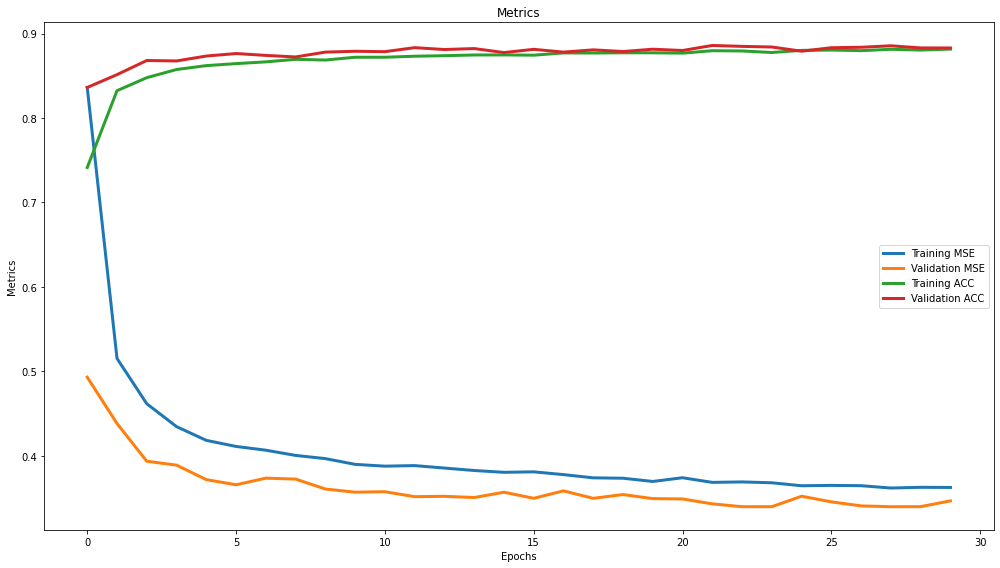

In [19]:
# plot loss graph

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training MSE", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation MSE", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["acc"], 
        label="Training ACC", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["val_acc"], 
        label="Validation ACC", lw=3)
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.title("Metrics")
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
model.summary()

Model: "positional_ratings_predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                1696      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
final_hidden_layer (Dense)   (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 15

In [21]:
# get output of last dense hidden layer with training flag set to 0

import keras.backend as K

outputs = [model.get_layer('final_hidden_layer').output]
functor = K.function([model.input], outputs)
layer_outs = functor([df_preprocessed_test[feature_cols].values, 0])
df_embeddings = pd.DataFrame(np.array(layer_outs).reshape(len(df_preprocessed_test[feature_cols]),32))
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.863857,0.634942,0.272183,-0.580553,-0.158214,-0.391058,4.199223,-4.239530,7.151131,-1.102329,0.006511,-0.845532,0.291925,3.291946,-8.995121,-3.160222,-0.426004,6.421218,8.259454,-4.400517,-0.788130,-0.215252,-1.117842,0.684675,0.658058,-10.086749,5.180772,-0.636746,3.701283,-1.340240,-0.340150,-0.484705
1,-1.295184,-1.169942,-0.586737,0.631089,1.509150,-0.469290,5.421813,-4.446539,7.489435,0.511519,0.390023,-2.497777,0.992504,4.248317,-9.121114,-3.207776,0.683245,6.548532,6.957283,-4.905813,-1.793030,0.863022,-1.239507,0.733637,2.251800,-8.858986,4.383548,-2.521100,3.111459,-2.355674,1.048607,-3.085572
2,-0.013505,1.119455,0.345967,-1.609577,-0.360086,-0.074156,3.115079,-3.335720,5.853575,-1.773153,-0.242893,0.226301,0.418285,2.444474,-6.942975,-2.765208,-0.063368,5.162345,7.173157,-3.405433,-0.266023,-1.105522,-1.087181,-0.169650,0.457385,-8.386905,3.902212,0.440433,2.981427,-0.611767,-1.674778,-0.341041
3,-0.692928,6.327550,-3.127550,0.471126,2.449219,-8.364792,10.433990,-3.718156,-7.229097,-1.948979,10.402751,3.167587,13.836357,9.942452,-6.962172,-12.622500,-3.390667,8.367205,4.571504,16.196201,-7.999413,4.332507,3.240108,5.232685,-1.701681,6.052122,-3.390971,-10.385432,10.811114,13.187263,8.135312,-5.474589
4,-0.719897,-0.440016,-0.509053,0.234264,0.675071,-0.057337,3.529629,-2.750463,4.615469,0.150518,0.577116,-1.234150,0.540378,2.791646,-6.256373,-2.271243,0.125225,4.573331,5.053303,-2.889874,-1.138571,0.861963,-0.413434,0.659251,0.882705,-5.958117,2.969143,-1.602404,2.485854,-1.352337,0.671572,-1.374897


In [22]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.863857,0.634942,0.272183,-0.580553,-0.158214,-0.391058,4.199223,-4.239530,7.151131,-1.102329,0.006511,-0.845532,0.291925,3.291946,-8.995121,-3.160222,-0.426004,6.421218,8.259454,-4.400517,-0.788130,-0.215252,-1.117842,0.684675,0.658058,-10.086749,5.180772,-0.636746,3.701283,-1.340240,-0.340150,-0.484705
1,-1.295184,-1.169942,-0.586737,0.631089,1.509150,-0.469290,5.421813,-4.446539,7.489435,0.511519,0.390023,-2.497777,0.992504,4.248317,-9.121114,-3.207776,0.683245,6.548532,6.957283,-4.905813,-1.793030,0.863022,-1.239507,0.733637,2.251800,-8.858986,4.383548,-2.521100,3.111459,-2.355674,1.048607,-3.085572
2,-0.013505,1.119455,0.345967,-1.609577,-0.360086,-0.074156,3.115079,-3.335720,5.853575,-1.773153,-0.242893,0.226301,0.418285,2.444474,-6.942975,-2.765208,-0.063368,5.162345,7.173157,-3.405433,-0.266023,-1.105522,-1.087181,-0.169650,0.457385,-8.386905,3.902212,0.440433,2.981427,-0.611767,-1.674778,-0.341041
3,-0.692928,6.327550,-3.127550,0.471126,2.449219,-8.364792,10.433990,-3.718156,-7.229097,-1.948979,10.402751,3.167587,13.836357,9.942452,-6.962172,-12.622500,-3.390667,8.367205,4.571504,16.196201,-7.999413,4.332507,3.240108,5.232685,-1.701681,6.052122,-3.390971,-10.385432,10.811114,13.187263,8.135312,-5.474589
4,-0.719897,-0.440016,-0.509053,0.234264,0.675071,-0.057337,3.529629,-2.750463,4.615469,0.150518,0.577116,-1.234150,0.540378,2.791646,-6.256373,-2.271243,0.125225,4.573331,5.053303,-2.889874,-1.138571,0.861963,-0.413434,0.659251,0.882705,-5.958117,2.969143,-1.602404,2.485854,-1.352337,0.671572,-1.374897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,-0.409369,-0.139614,0.406094,0.098996,-0.076204,0.277647,0.001589,0.194979,0.589942,0.352022,0.560827,0.276149,-0.041952,0.072447,0.044512,0.520001,-0.253233,0.332718,0.566225,0.072886,0.443492,-0.023544,0.089387,0.377112,-0.135347,-0.399095,0.595753,0.268009,0.290695,0.048442,-0.103413,0.440062
14877,-0.767976,0.064973,0.646429,-0.224025,-0.184348,0.194676,0.105355,0.014223,1.360282,-0.006520,0.590989,0.350038,-0.179556,0.030989,-0.219816,0.406218,-0.757371,0.515945,1.245011,-0.107312,0.557983,-0.358082,-0.079937,0.547485,-0.272230,-1.693911,1.255541,0.466638,0.718256,-0.158377,-0.400218,0.665990
14878,1.048329,3.151140,-1.513561,-0.207578,0.998109,-3.138497,4.348627,-1.561394,-3.091637,-0.821584,4.389604,2.092448,6.219642,4.755848,-2.586576,-3.841556,-1.008746,3.585450,2.087743,7.303677,-3.067714,1.057920,2.120668,1.755199,-0.723181,3.030077,-2.158119,-3.656086,4.712954,5.808035,3.399415,-2.872532
14879,0.687466,0.675230,0.811672,-0.402571,0.864568,0.912498,-0.073326,-0.367008,-0.247616,-0.378814,-0.163983,0.174791,1.307168,0.325516,0.819858,-1.778169,0.952240,-0.088252,0.635080,0.398221,-0.423829,-0.714566,-1.224082,-0.975124,1.022809,1.018024,-0.607142,0.477167,0.625417,1.430796,-0.944144,-1.666126


In [23]:
df_embeddings.columns = [f'PC{i}' for i in range(32)]
df_embeddings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,-0.863857,0.634942,0.272183,-0.580553,-0.158214,-0.391058,4.199223,-4.239530,7.151131,-1.102329,0.006511,-0.845532,0.291925,3.291946,-8.995121,-3.160222,-0.426004,6.421218,8.259454,-4.400517,-0.788130,-0.215252,-1.117842,0.684675,0.658058,-10.086749,5.180772,-0.636746,3.701283,-1.340240,-0.340150,-0.484705
1,-1.295184,-1.169942,-0.586737,0.631089,1.509150,-0.469290,5.421813,-4.446539,7.489435,0.511519,0.390023,-2.497777,0.992504,4.248317,-9.121114,-3.207776,0.683245,6.548532,6.957283,-4.905813,-1.793030,0.863022,-1.239507,0.733637,2.251800,-8.858986,4.383548,-2.521100,3.111459,-2.355674,1.048607,-3.085572
2,-0.013505,1.119455,0.345967,-1.609577,-0.360086,-0.074156,3.115079,-3.335720,5.853575,-1.773153,-0.242893,0.226301,0.418285,2.444474,-6.942975,-2.765208,-0.063368,5.162345,7.173157,-3.405433,-0.266023,-1.105522,-1.087181,-0.169650,0.457385,-8.386905,3.902212,0.440433,2.981427,-0.611767,-1.674778,-0.341041
3,-0.692928,6.327550,-3.127550,0.471126,2.449219,-8.364792,10.433990,-3.718156,-7.229097,-1.948979,10.402751,3.167587,13.836357,9.942452,-6.962172,-12.622500,-3.390667,8.367205,4.571504,16.196201,-7.999413,4.332507,3.240108,5.232685,-1.701681,6.052122,-3.390971,-10.385432,10.811114,13.187263,8.135312,-5.474589
4,-0.719897,-0.440016,-0.509053,0.234264,0.675071,-0.057337,3.529629,-2.750463,4.615469,0.150518,0.577116,-1.234150,0.540378,2.791646,-6.256373,-2.271243,0.125225,4.573331,5.053303,-2.889874,-1.138571,0.861963,-0.413434,0.659251,0.882705,-5.958117,2.969143,-1.602404,2.485854,-1.352337,0.671572,-1.374897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,-0.409369,-0.139614,0.406094,0.098996,-0.076204,0.277647,0.001589,0.194979,0.589942,0.352022,0.560827,0.276149,-0.041952,0.072447,0.044512,0.520001,-0.253233,0.332718,0.566225,0.072886,0.443492,-0.023544,0.089387,0.377112,-0.135347,-0.399095,0.595753,0.268009,0.290695,0.048442,-0.103413,0.440062
14877,-0.767976,0.064973,0.646429,-0.224025,-0.184348,0.194676,0.105355,0.014223,1.360282,-0.006520,0.590989,0.350038,-0.179556,0.030989,-0.219816,0.406218,-0.757371,0.515945,1.245011,-0.107312,0.557983,-0.358082,-0.079937,0.547485,-0.272230,-1.693911,1.255541,0.466638,0.718256,-0.158377,-0.400218,0.665990
14878,1.048329,3.151140,-1.513561,-0.207578,0.998109,-3.138497,4.348627,-1.561394,-3.091637,-0.821584,4.389604,2.092448,6.219642,4.755848,-2.586576,-3.841556,-1.008746,3.585450,2.087743,7.303677,-3.067714,1.057920,2.120668,1.755199,-0.723181,3.030077,-2.158119,-3.656086,4.712954,5.808035,3.399415,-2.872532
14879,0.687466,0.675230,0.811672,-0.402571,0.864568,0.912498,-0.073326,-0.367008,-0.247616,-0.378814,-0.163983,0.174791,1.307168,0.325516,0.819858,-1.778169,0.952240,-0.088252,0.635080,0.398221,-0.423829,-0.714566,-1.224082,-0.975124,1.022809,1.018024,-0.607142,0.477167,0.625417,1.430796,-0.944144,-1.666126


In [24]:
df_test_save = pd.concat([df_nominal_test, df_embeddings], axis=1)

In [25]:
df_test_save

,sofifa_id,short_name,long_name,dob,fifa,player_positions_general,player_positions,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,16,ATK,"RW, CF",-0.863857,0.634942,0.272183,-0.580553,-0.158214,-0.391058,4.199223,-4.239530,7.151131,-1.102329,0.006511,-0.845532,0.291925,3.291946,-8.995121,-3.160222,-0.426004,6.421218,8.259454,-4.400517,-0.788130,-0.215252,-1.117842,0.684675,0.658058,-10.086749,5.180772,-0.636746,3.701283,-1.340240,-0.340150,-0.484705
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,16,ATK,"LW, LM",-1.295184,-1.169942,-0.586737,0.631089,1.509150,-0.469290,5.421813,-4.446539,7.489435,0.511519,0.390023,-2.497777,0.992504,4.248317,-9.121114,-3.207776,0.683245,6.548532,6.957283,-4.905813,-1.793030,0.863022,-1.239507,0.733637,2.251800,-8.858986,4.383548,-2.521100,3.111459,-2.355674,1.048607,-3.085572
2,9014,A. Robben,Arjen Robben,1984-01-23,16,MID,"RM, LM, RW",-0.013505,1.119455,0.345967,-1.609577,-0.360086,-0.074156,3.115079,-3.335720,5.853575,-1.773153,-0.242893,0.226301,0.418285,2.444474,-6.942975,-2.765208,-0.063368,5.162345,7.173157,-3.405433,-0.266023,-1.105522,-1.087181,-0.169650,0.457385,-8.386905,3.902212,0.440433,2.981427,-0.611767,-1.674778,-0.341041
3,167495,M. Neuer,Manuel Neuer,1986-03-27,16,GK,GK,-0.692928,6.327550,-3.127550,0.471126,2.449219,-8.364792,10.433990,-3.718156,-7.229097,-1.948979,10.402751,3.167587,13.836357,9.942452,-6.962172,-12.622500,-3.390667,8.367205,4.571504,16.196201,-7.999413,4.332507,3.240108,5.232685,-1.701681,6.052122,-3.390971,-10.385432,10.811114,13.187263,8.135312,-5.474589
4,176580,L. Suárez,Luis Alberto Suárez Díaz,1987-01-24,16,ATK,ST,-0.719897,-0.440016,-0.509053,0.234264,0.675071,-0.057337,3.529629,-2.750463,4.615469,0.150518,0.577116,-1.234150,0.540378,2.791646,-6.256373,-2.271243,0.125225,4.573331,5.053303,-2.889874,-1.138571,0.861963,-0.413434,0.659251,0.882705,-5.958117,2.969143,-1.602404,2.485854,-1.352337,0.671572,-1.374897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,224867,R. Horne,Ryan Horne,1995-11-02,16,MID,CM,-0.409369,-0.139614,0.406094,0.098996,-0.076204,0.277647,0.001589,0.194979,0.589942,0.352022,0.560827,0.276149,-0.041952,0.072447,0.044512,0.520001,-0.253233,0.332718,0.566225,0.072886,0.443492,-0.023544,0.089387,0.377112,-0.135347,-0.399095,0.595753,0.268009,0.290695,0.048442,-0.103413,0.440062
14877,229852,C. Shephard,Corey Shephard,1997-12-28,16,MID,CM,-0.767976,0.064973,0.646429,-0.224025,-0.184348,0.194676,0.105355,0.014223,1.360282,-0.006520,0.590989,0.350038,-0.179556,0.030989,-0.219816,0.406218,-0.757371,0.515945,1.245011,-0.107312,0.557983,-0.358082,-0.079937,0.547485,-0.272230,-1.693911,1.255541,0.466638,0.718256,-0.158377,-0.400218,0.665990
14878,227910,L. Gooch,Liam Gooch,1997-11-25,16,GK,GK,1.048329,3.151140,-1.513561,-0.207578,0.998109,-3.138497,4.348627,-1.561394,-3.091637,-0.821584,4.389604,2.092448,6.219642,4.755848,-2.586576,-3.841556,-1.008746,3.585450,2.087743,7.303677,-3.067714,1.057920,2.120668,1.755199,-0.723181,3.030077,-2.158119,-3.656086,4.712954,5.808035,3.399415,-2.872532
14879,225339,S. Warburton,Sam Warburton,1996-10-10,16,DEF,"LB, LM",0.687466,0.675230,0.811672,-0.402571,0.864568,0.912498,-0.073326,-0.367008,-0.247616,-0.378814,-0.163983,0.174791,1.307168,0.325516,0.819858,-1.778169,0.952240,-0.088252,0.635080,0.398221,-0.423829,-0.714566,-1.224082,-0.975124,1.022809,1.018024,-0.607142,0.477167,0.625417,1.430796,-0.944144,-1.666126


In [26]:
df_test_save.to_csv('dnn_embeddings_v3.csv', index=False)

In [27]:
df_subset = pd.concat([df_embeddings, df_nominal_test[['player_positions', 'fifa','player_positions_general']]], axis=1)


In [28]:
df_subset["first_pos"] = pd.DataFrame(df_subset.player_positions.str.split(", ").to_list())[0]

In [29]:
df_subset

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,player_positions,fifa,player_positions_general,first_pos
0,-0.863857,0.634942,0.272183,-0.580553,-0.158214,-0.391058,4.199223,-4.239530,7.151131,-1.102329,0.006511,-0.845532,0.291925,3.291946,-8.995121,-3.160222,-0.426004,6.421218,8.259454,-4.400517,-0.788130,-0.215252,-1.117842,0.684675,0.658058,-10.086749,5.180772,-0.636746,3.701283,-1.340240,-0.340150,-0.484705,"RW, CF",16,ATK,RW
1,-1.295184,-1.169942,-0.586737,0.631089,1.509150,-0.469290,5.421813,-4.446539,7.489435,0.511519,0.390023,-2.497777,0.992504,4.248317,-9.121114,-3.207776,0.683245,6.548532,6.957283,-4.905813,-1.793030,0.863022,-1.239507,0.733637,2.251800,-8.858986,4.383548,-2.521100,3.111459,-2.355674,1.048607,-3.085572,"LW, LM",16,ATK,LW
2,-0.013505,1.119455,0.345967,-1.609577,-0.360086,-0.074156,3.115079,-3.335720,5.853575,-1.773153,-0.242893,0.226301,0.418285,2.444474,-6.942975,-2.765208,-0.063368,5.162345,7.173157,-3.405433,-0.266023,-1.105522,-1.087181,-0.169650,0.457385,-8.386905,3.902212,0.440433,2.981427,-0.611767,-1.674778,-0.341041,"RM, LM, RW",16,MID,RM
3,-0.692928,6.327550,-3.127550,0.471126,2.449219,-8.364792,10.433990,-3.718156,-7.229097,-1.948979,10.402751,3.167587,13.836357,9.942452,-6.962172,-12.622500,-3.390667,8.367205,4.571504,16.196201,-7.999413,4.332507,3.240108,5.232685,-1.701681,6.052122,-3.390971,-10.385432,10.811114,13.187263,8.135312,-5.474589,GK,16,GK,GK
4,-0.719897,-0.440016,-0.509053,0.234264,0.675071,-0.057337,3.529629,-2.750463,4.615469,0.150518,0.577116,-1.234150,0.540378,2.791646,-6.256373,-2.271243,0.125225,4.573331,5.053303,-2.889874,-1.138571,0.861963,-0.413434,0.659251,0.882705,-5.958117,2.969143,-1.602404,2.485854,-1.352337,0.671572,-1.374897,ST,16,ATK,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,-0.409369,-0.139614,0.406094,0.098996,-0.076204,0.277647,0.001589,0.194979,0.589942,0.352022,0.560827,0.276149,-0.041952,0.072447,0.044512,0.520001,-0.253233,0.332718,0.566225,0.072886,0.443492,-0.023544,0.089387,0.377112,-0.135347,-0.399095,0.595753,0.268009,0.290695,0.048442,-0.103413,0.440062,CM,16,MID,CM
14877,-0.767976,0.064973,0.646429,-0.224025,-0.184348,0.194676,0.105355,0.014223,1.360282,-0.006520,0.590989,0.350038,-0.179556,0.030989,-0.219816,0.406218,-0.757371,0.515945,1.245011,-0.107312,0.557983,-0.358082,-0.079937,0.547485,-0.272230,-1.693911,1.255541,0.466638,0.718256,-0.158377,-0.400218,0.665990,CM,16,MID,CM
14878,1.048329,3.151140,-1.513561,-0.207578,0.998109,-3.138497,4.348627,-1.561394,-3.091637,-0.821584,4.389604,2.092448,6.219642,4.755848,-2.586576,-3.841556,-1.008746,3.585450,2.087743,7.303677,-3.067714,1.057920,2.120668,1.755199,-0.723181,3.030077,-2.158119,-3.656086,4.712954,5.808035,3.399415,-2.872532,GK,16,GK,GK
14879,0.687466,0.675230,0.811672,-0.402571,0.864568,0.912498,-0.073326,-0.367008,-0.247616,-0.378814,-0.163983,0.174791,1.307168,0.325516,0.819858,-1.778169,0.952240,-0.088252,0.635080,0.398221,-0.423829,-0.714566,-1.224082,-0.975124,1.022809,1.018024,-0.607142,0.477167,0.625417,1.430796,-0.944144,-1.666126,"LB, LM",16,DEF,LB


In [30]:
# visualizing the embeddings

import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=350)
tsne_results = tsne.fit_transform(df_subset.drop(columns=['player_positions','fifa','first_pos','player_positions_general']))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14881 samples in 0.058s...
[t-SNE] Computed neighbors for 14881 samples in 2.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14881
[t-SNE] Computed conditional probabilities for sample 2000 / 14881
[t-SNE] Computed conditional probabilities for sample 3000 / 14881
[t-SNE] Computed conditional probabilities for sample 4000 / 14881
[t-SNE] Computed conditional probabilities for sample 5000 / 14881
[t-SNE] Computed conditional probabilities for sample 6000 / 14881
[t-SNE] Computed conditional probabilities for sample 7000 / 14881
[t-SNE] Computed conditional probabilities for sample 8000 / 14881
[t-SNE] Computed conditional probabilities for sample 9000 / 14881
[t-SNE] Computed conditional probabilities for sample 10000 / 14881
[t-SNE] Computed conditional probabilities for sample 11000 / 14881
[t-SNE] Computed conditional probabilities for sample 12000 / 14881
[t-SNE] Computed conditional probabilities for sa

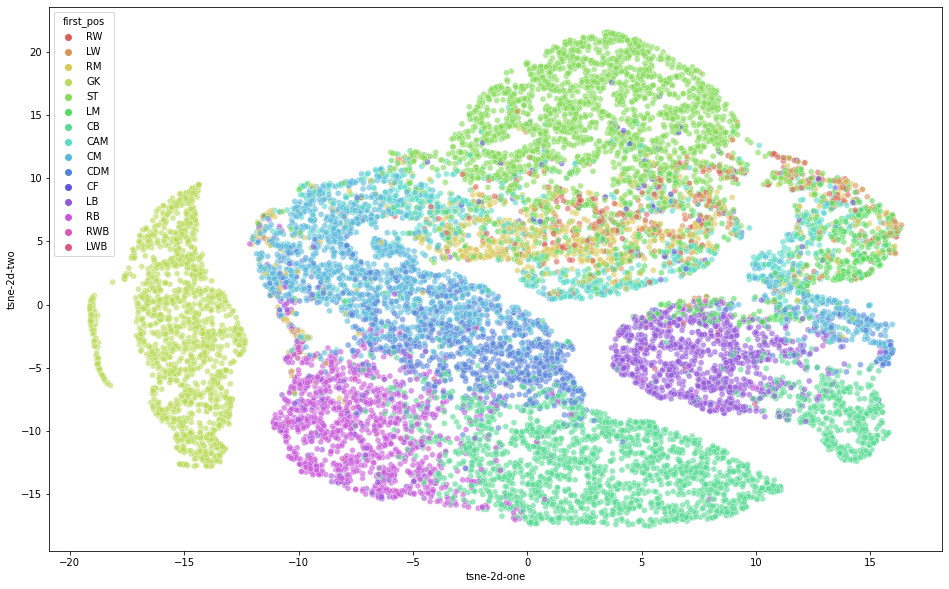

In [31]:
# plot tsne results on scatterplot, without generalized positions

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="first_pos",
    palette=sns.color_palette("hls", len(df_subset.first_pos.unique())),
    data=df_subset,
    legend="full",
    alpha=0.6
)

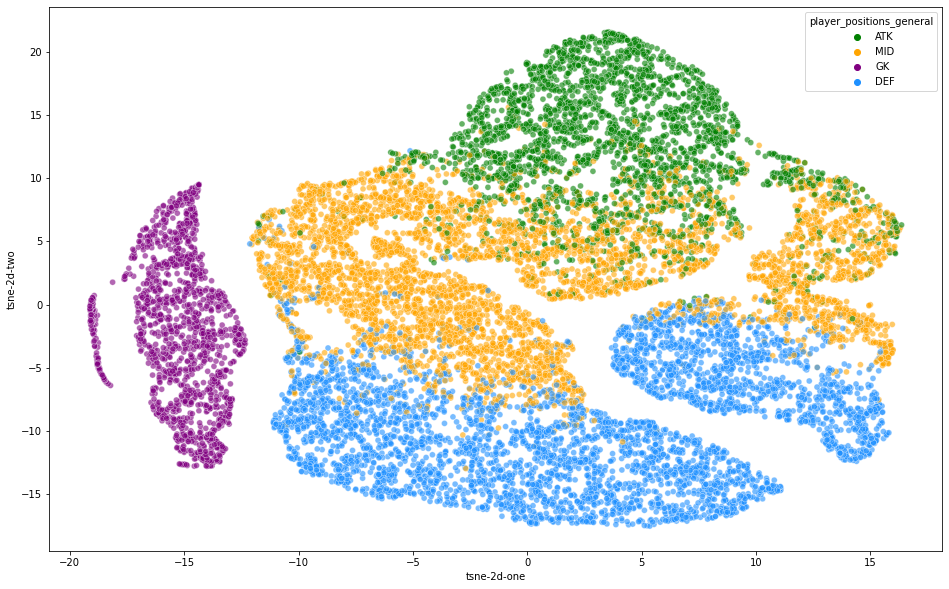

In [33]:
# plot tsne results on scatterplot, where ATK = 0, DEF = 1, GK = 2, MID = 3

color_dict = dict({'ATK':'green',
                  'MID':'orange',
                  'DEF': 'dodgerblue',
                  'GK': 'purple',
                 })

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="player_positions_general",
    palette=color_dict,
    data=df_subset,
    legend="full",
    alpha=0.6
)